## Task 1
Below, we are following the [tensorflow tutorial](https://www.tensorflow.org/tutorials/images/cnn) on convolutional neural networks (CNNs) for [CIFAR images](https://www.cs.toronto.edu/%7Ekriz/cifar.html) classification. In this first task, we mimic the tutorial completely using a basic CNN based on ReLU activation functions. We call this the **Basic ReLU model**. The assessment of the model (and all the following models in subsequent tasks) are given in the form of training/test accuracy and loss plots.

In [170]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt

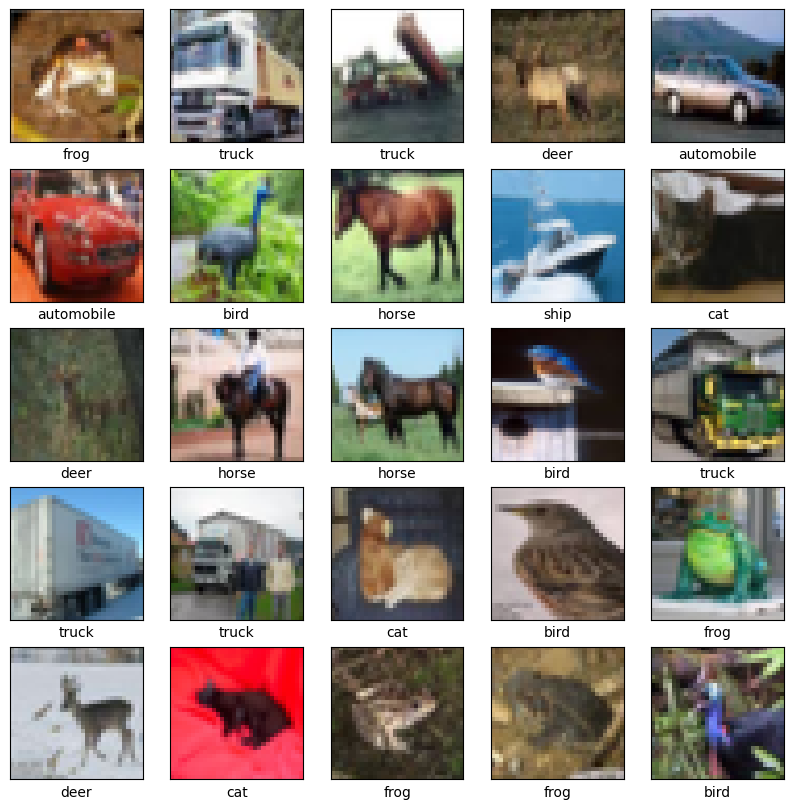

In [171]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_54 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3436 - loss: 1.7750 - val_accuracy: 0.5325 - val_loss: 1.2793
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5653 - loss: 1.2213 - val_accuracy: 0.6215 - val_loss: 1.0745
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6289 - loss: 1.0504 - val_accuracy: 0.6311 - val_loss: 1.0566
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6699 - loss: 0.9400 - val_accuracy: 0.6637 - val_loss: 0.9603
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6996 - loss: 0.8605 - val_accuracy: 0.6868 - val_loss: 0.9132
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7256 - loss: 0.7840 - val_accuracy: 0.6956 - val_loss: 0.8961
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7413 - loss: 0.7369 - val_accuracy: 0.6906 - val_loss: 0.9132
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7472 - loss: 0.7177 - 

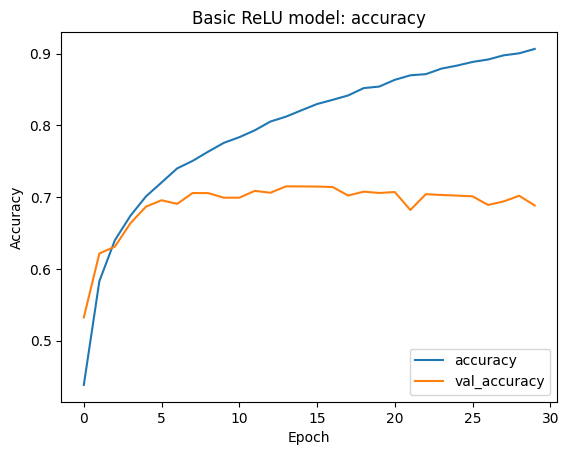

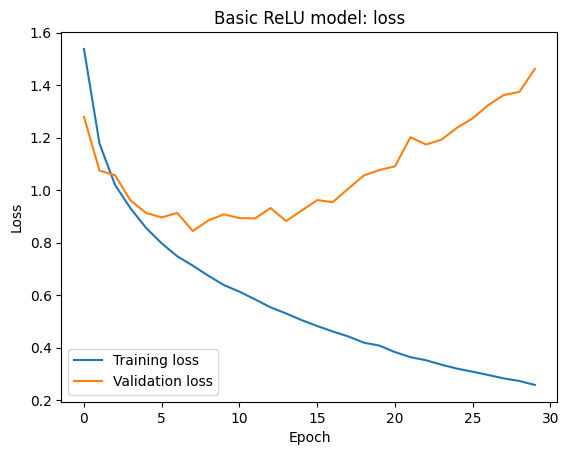

In [196]:
# basic ReLU model
model = models.Sequential(
    [
        keras.Input((32, 32, 3)),

        layers.Conv2D(32, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training model
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

# testing the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with basic ReLU model: ", test_acc)

#plotting results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic ReLU model: accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

As can be seen from the abover plots, the **Basic ReLU model** resulted in max classification accuracy of around 70 %. From the loss plot, the training seems to converge, but the u-shape of the validation plot and where its minimum is placed on the epoch-axis indicate that there is quite a bit of overfitting that takes place long before the convergence of the training is sufficiently reached. 

## Task 2
The second task consists of us repeating the first task, but replacing ReLU with tanh activation functions. We call this new model the **Basic tanh model**. We build, train and test the model and then compare the results to the previous model.

We believe that the reason tanh has slightly lower accuracy than ReLU for the same number of epochs is because the derivative of tanh
is stricyly less than the derivative of ReLU on the interval [0,1], which is where the values of all our pictures lie.

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 31ms/step - accuracy: 0.4252 - loss: 1.6086 - val_accuracy: 0.5607 - val_loss: 1.2374
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5983 - loss: 1.1507 - val_accuracy: 0.6126 - val_loss: 1.1219
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6411 - loss: 1.0395 - val_accuracy: 0.6257 - val_loss: 1.0731
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6657 - loss: 0.9592 - val_accuracy: 0.6433 - val_loss: 1.0315
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6835 - loss: 0.9125 - val_accuracy: 0.6413 - val_loss: 1.0348
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7067 - loss: 0.8583 - val_accuracy: 0.6535 - val_loss: 1.0079
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7208 - loss: 0.8127 - val_accuracy: 0.6606 - val_loss: 0.9917
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7367 - loss

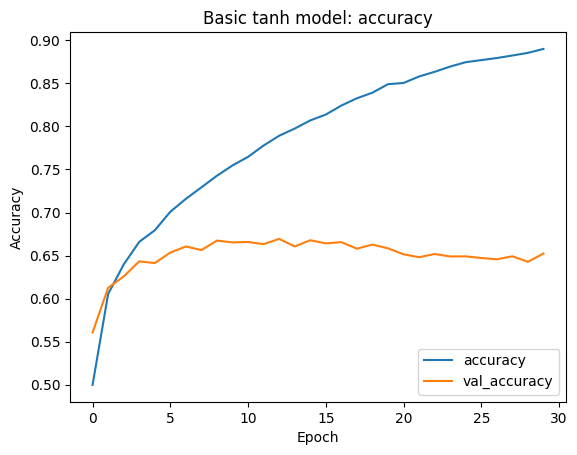

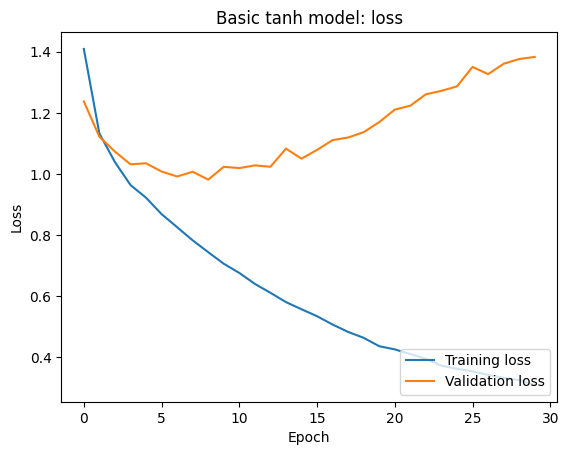

In [ ]:
# basic tanh model
model_tanh = models.Sequential(
    [
        keras.Input((32, 32, 3)),

        layers.Conv2D(32, (3, 3)),
        layers.Activation('tanh'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('tanh'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('tanh'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('tanh'),
        layers.Dense(10)
    ]
)

model_tanh.summary()

model_tanh.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_tanh = model_tanh.fit(train_images, train_labels, epochs=30,
                              validation_data=(test_images, test_labels))

# testing the tanh model and comparing to previous
test_loss_tanh, test_acc_tanh = model_tanh.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with basic tanh model: ", test_acc_tanh)

# plotting the results
plt.plot(history_tanh.history['accuracy'], label='accuracy')
plt.plot(history_tanh.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic tanh model: accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history_tanh.history['loss'], label='Training loss')
plt.plot(history_tanh.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic tanh model: loss')
plt.legend(loc='lower left')
plt.show()

Looking at the above plots the max accuracy of the basic tanh model is around 67 %. This is slightly worse, but quite similar to the approx. 70 % that we got from the basic ReLU model. Looking at the loss, we note two things: the training convergence for the tanh model, for the same number of epochs, is slower than for the ReLU model; and the minimum validation loss is quite a bit higher in the tanh model. Indications of overfitting are present here as well.

Crudely speaking, the loss might be higher as a result of poor training, and the poor training might be due to the gradient descent not finding minima as fast while using the tanh activation function. This is quite reasonable as our pixel values have been normalized to be between 0 and 1, and on this interval, the gradient of $\tanh(x)$ is strictly less than ReLU$(x)$, and in our optimization step we are using the same (default) learning rate $\alpha$. In order to compensate for this smaller gradient, we would probably have to increase the learning rate in order for $\tanh$ to converge equally fast.

## Task 3
In this task, we want to give an explanation of why the increase in channels between layers is necessary for the CNN. Similarly to feedforward neural networks, we want the dimensionality of the layers to increase smoothly in the beginning and decrease smoothly towards the end where we need the final layer to be a vector such that it can easily be mapped to the final classification vector. The initial increase could (somewhat heuristically) be seen as the process of going to a higher-dimensional representation of the input where a sort of feature selection/feature detangling can take place.

As the convolution operator itself (as long as kernel size > 1x1) naturally shrinks the image, in order for this initial increase to take place, we need some counterweight to both store information about the pixels that were lost, but also give some extra space for this feature separation to take place. This is where the channels come in. Looking above to the table that summarizes the basic tanh model, we can see that the increase of dimensionality actually only takes place in the first convolution layer, where the total dimensionality goes from 32x32x3 to 30x30x32. After that, each convolution results in a lower total dimensionality than before.

It is hard to give an intuitive interpretation of what the channels (apart from the input RGB) actually mean, but loosely speaking, we could say that they store spatial information about the image that would get lost if we were to simply flatten the image to a vector immediately. There are some examples where the channels store concrete information, such as rotations of the image for example, but this seems more like a special case usage rather than the norm (see Figure 9.9 in Goodfellow).

Furthermore, why 32 and 64 were specifically chosen as the channel sizes, it is because they are powers of two, and therefore in the natural language of the computer.

## Task 4
In this task we are going to add a modification to the basic ReLU model in the form of **batch normalization**. We are then again going to compare the results as we have done previously. For the batch normalization we use a mini-batch size of 16 (as opposed to the default value of 32 that we have used for the previous models). We call this new model the **ReLU + batch normalization model**.

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_60 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_61 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_62 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_63 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,466 (482.29 KB)

 Trainable params: 123,018 (480.54 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.4566 - loss: 1.5176 - val_accuracy: 0.5101 - val_loss: 1.4812
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6528 - loss: 0.9976 - val_accuracy: 0.3237 - val_loss: 2.7691
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7101 - loss: 0.8379 - val_accuracy: 0.6803 - val_loss: 0.9075
Epoch 4/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7372 - loss: 0.7561 - val_accuracy: 0.6114 - val_loss: 1.1781
Epoch 5/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7598 - loss: 0.6921 - val_accuracy: 0.7047 - val_loss: 0.8799
Epoch 6/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7831 - loss: 0.6248 - val_accuracy: 0.6698 - val_loss: 1.0140
Epoch 7/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8003 - loss: 0.5814 - val_accuracy: 0.7533 - val_loss: 0.7409
Epoch 8/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8149 - loss: 0

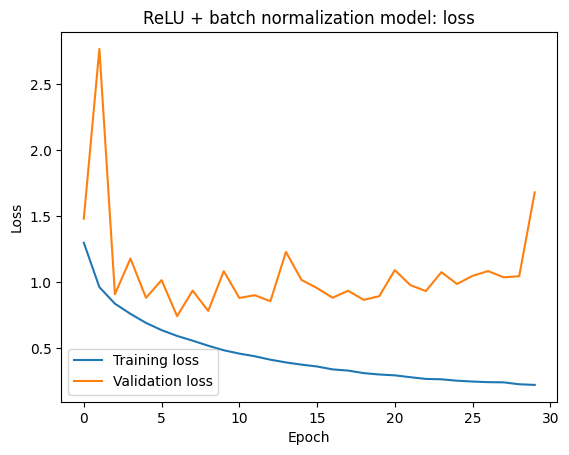

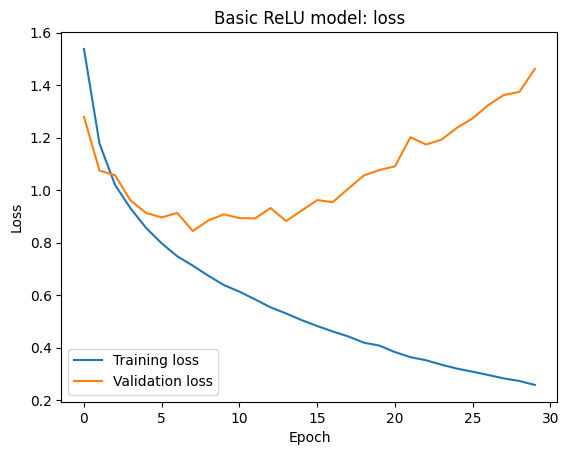

In [198]:
# batch normalization model
model_bn = models.Sequential(
    [
        tf.keras.Input((32, 32, 3)),
        
        layers.Conv2D(32, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model_bn.summary()

model_bn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# default mini-batch size is 32
history_bn = model_bn.fit(train_images, train_labels, epochs=30,
                          validation_data=(test_images, test_labels), batch_size=16)

# testing the model
test_loss_bn, test_acc_bn = model_bn.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with ReLU + batch normalization model: ", test_acc_bn)
print("Test accuracy with basic ReLU model: ", test_acc)

# plotting the results of the batch normalization model
plt.plot(history_bn.history['loss'], label='Training loss')
plt.plot(history_bn.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU + batch normalization model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

Comparing accuracies, we see that (from print-out above plots) the basic ReLU model has slightly higher test accuracy: 69 % for the basic ReLU as opposed to 66 % for the one using batch normalization. Regarding the losses of the two models, the batch normalization model seems to converge in training a lot faster in number of epochs (albeit more than twice the compute time) and the u-shape of the validation curve is a lot less pronounced, indicating less overfitting which itself implies better generalization to new data, of the batch normalization model.

In the best case scenario for each of the two models, they perform very similarly on loss and accuracy. The real benefit we see in the batch normalization model is the reduced overfitting. Batch normalization works similarly to stocahstic gradient descent in the way that it adds a bit of noise to the model. This is probably why we see improvents in the fit of the model. However, this coms at the price of introducing new trainable parameters and the extra compute time that accompanies them, and the extra compute that is required for the normalization itself.

The batch normalization should also theoretically increase the stability of the model, i.e. that small perturbations in the input should not affect the output drastically. This, however, is hard to tell without compiling several different training runs together.

## Task 5
We are now going to try out some basic data augmentation techniques in a model and see how the results compare to the basic ReLU model. We will call this new model the **ReLU + data augmentation model**.

We are using a very basic form of data augmentation consisting of random (50 % chance) horizontal flips and a small shift (also random) in the contrast of the image. The motivation for using such a simple data augmentation is that as we add more complex augmentation methods, we are essentially expanding the domain that we, through training, have to explore - i.e. we require more training, more epochs. Since we don't want to spend too much time on compute, we deem our basic data augmentation to be sufficient to explore its potential benefits.

Below are some example augmentations of a frog plotted. The change in contrast is barely visible.

We are then going to compare the results as previously.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0118252].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0280606].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0039074].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.021497].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0194992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.022129].


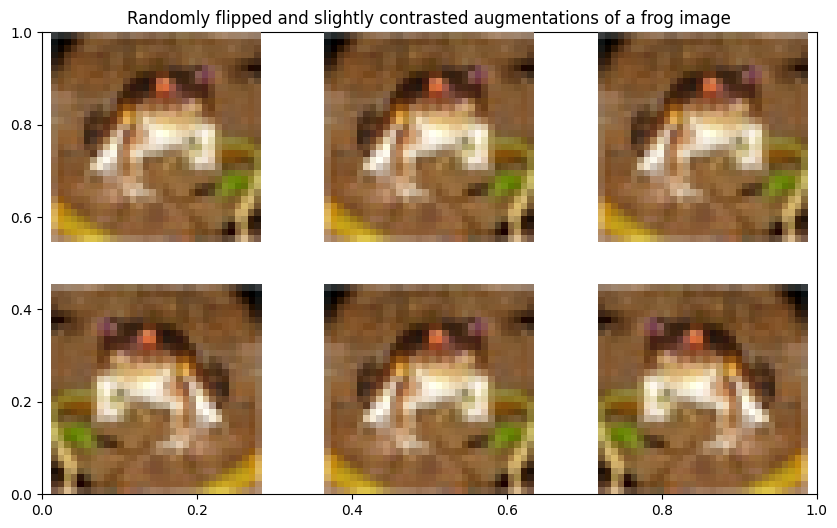

In [199]:
# temp data augmentation sequence for visualization
temp_augmentation = tf.keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomContrast(0.1)
    ]
)

# data augmentation of frog image visualized
frog = train_images[0]
plt.figure(figsize=(10, 6))
plt.title('Randomly flipped and slightly contrasted augmentations of a frog image')
for i in range(6):
  augmented_image = temp_augmentation(frog)
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(augmented_image)
  plt.axis("off")

#### Why data augmentation can help reduce overfitting and improve generalization power
As we have already mentioned, with data augmentation we are potentially expanding our data space. An expanded training space implies less risk of having to extrapolate on future data, thereby increasing the generalization power of the model. Furthermore, we are also filling in the gaps in the space that we already occupy, i.e. filling in the blanks but also making each area more dense. This should lead to a smoother fit to the data, i.e. reduce overfitting. Some types of data augmentation could also essentially be seen as a sort of noise injection into the model, similarly to the batch normalization. Noise injection is a type of regularization that mainly focuses on reducing the complexity.

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_24 (Sequential)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_64 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_65 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3521 - loss: 1.7382 - val_accuracy: 0.5153 - val_loss: 1.4056
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5680 - loss: 1.2108 - val_accuracy: 0.6143 - val_loss: 1.1148
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6369 - loss: 1.0340 - val_accuracy: 0.6556 - val_loss: 0.9798
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6743 - loss: 0.9332 - val_accuracy: 0.6565 - val_loss: 0.9643
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6989 - loss: 0.8535 - val_accuracy: 0.6974 - val_loss: 0.8800
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7175 - loss: 0.8106 - val_accuracy: 0.6842 - val_loss: 0.9332
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7345 - loss: 0.7583 - val_accuracy: 0.7173 - val_loss: 0.8190
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7477 - loss: 0.7246 - 

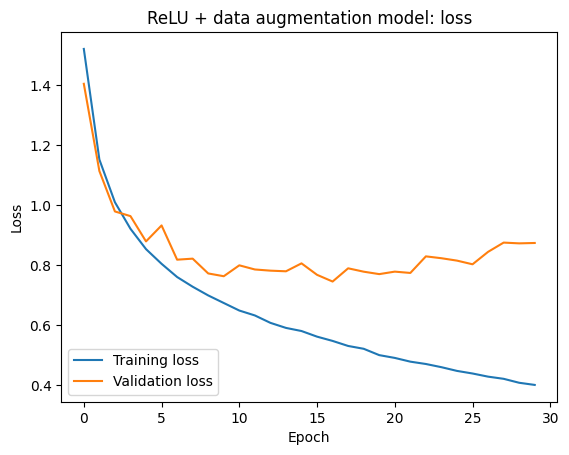

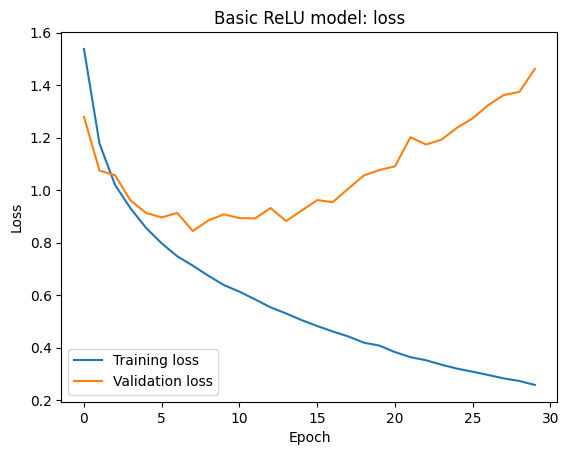

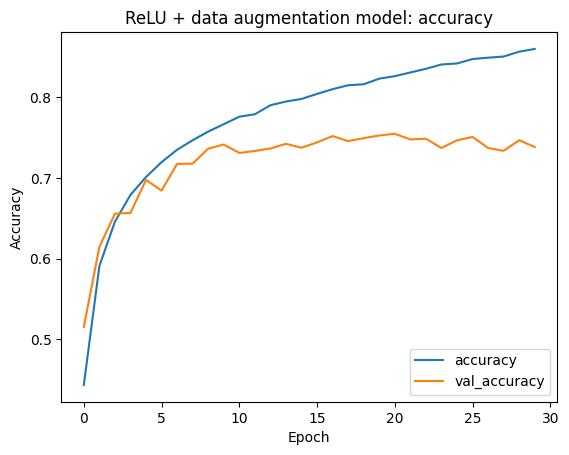

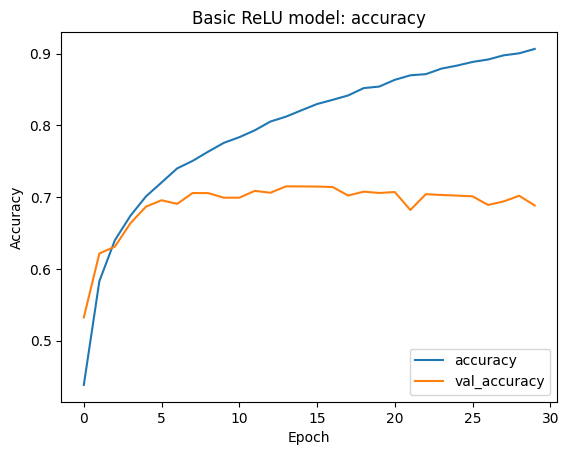

In [200]:
# data augmentation to be implemented
data_augmentation = tf.keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomContrast(0.1)
    ]
)

# data augmentation model
model_aug = models.Sequential(
    [
        tf.keras.Input((32, 32, 3)),
        data_augmentation,

        layers.Conv2D(32, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model_aug.summary()

model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training the model
history_aug = model_aug.fit(train_images, train_labels, epochs=30, 
                            validation_data=(test_images, test_labels))

# testing the data augmentation model
test_loss_aug, test_acc_aug = model_aug.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with ReLU + data augmentation model: ", test_acc_aug)
print("Test accuracy with basic ReLU model: ", test_acc)

# plotting the results of the data augmentation model
plt.plot(history_aug.history['loss'], label='Training loss')
plt.plot(history_aug.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU + data augmentation model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history_aug.history['accuracy'], label='accuracy')
plt.plot(history_aug.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("ReLU + data augmentation model: accuracy")
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic ReLU model: accuracy')
plt.legend(loc='lower right')
plt.show()

As opposed to previous models, the data augmentation had higher test accuracy than the basic ReLU model: 74 % as opposed to 69 %. From the loss plots we can also see that tha data aumentation model seems to converge faster than the basic ReLU model but at a slightly higher value. However, due to the overfitting thats indicated in the basci ReLU model, we shouldn't place too much emphasis on the fact that the training loss is slightly higher for the batch normalization model. Actually, the (light) plateauing of the validation loss curve from the batch normalization model indicates that this is a more proper fit that tests better on unseen data, i.e. the generalization has improved.

It should also be mentioned that the time it took to train each model for 30 epochs was pretty much identical. Thus, the data augmentation model has improved accuracy, reduced validation loss, reduced overfitting and improved generalization power at no apparent cost. One would have to run the training many times in order to really cement this hypothesis.

## Task 6
In this final task we are going to assess the role of color information in feature extraction by converting our input images to grayscale and train a basic ReLU model on this new training set. We call this new model the **ReLU + grayscale images model**. Again we are going to compare the accuracy and loss to the basic ReLU model.

Below is an example image of a frog in the new data set.

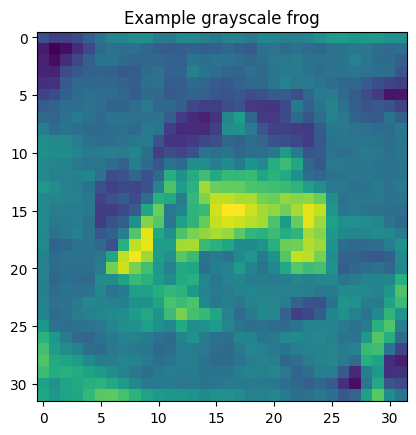

In [201]:
from skimage.color import rgb2gray
import numpy as np

# Convert train and test images to grayscale
train_images_gray = rgb2gray(train_images)
test_images_gray = rgb2gray(test_images)

# Add channel dimension for compatibility with CNNs
train_images_gray = train_images_gray [..., np.newaxis]
test_images_gray = test_images_gray [..., np.newaxis]

plt.imshow(train_images_gray[0])
plt.title("Example grayscale frog")
plt.show()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,994 (476.54 KB)

 Trainable params: 121,994 (476.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2849 - loss: 1.9247 - val_accuracy: 0.4887 - val_loss: 1.4264
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5216 - loss: 1.3619 - val_accuracy: 0.5532 - val_loss: 1.2795
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5987 - loss: 1.1627 - val_accuracy: 0.5940 - val_loss: 1.1668
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6271 - loss: 1.0682 - val_accuracy: 0.6116 - val_loss: 1.1083
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6609 - loss: 0.9786 - val_accuracy: 0.6547 - val_loss: 1.0034
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6789 - loss: 0.9283 - val_accuracy: 0.6548 - val_loss: 0.9961
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6928 - loss: 0.8765 - val_accuracy: 0.6607 - val_loss: 0.9828
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7124 - loss: 0.8238 - 

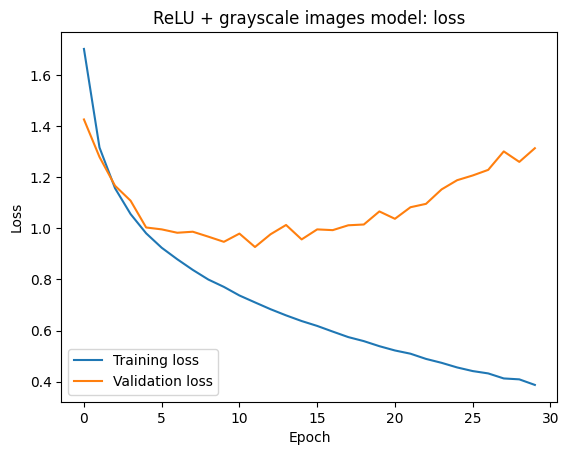

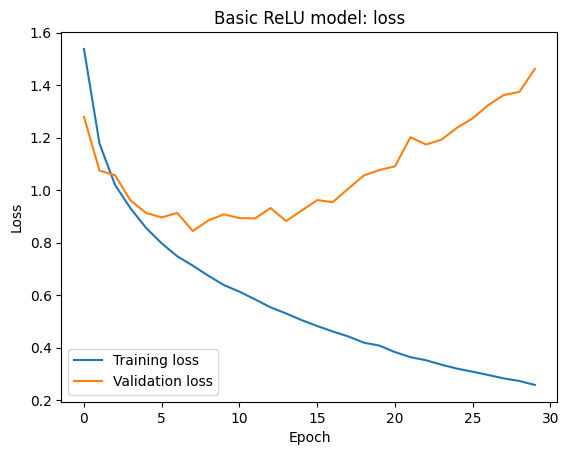

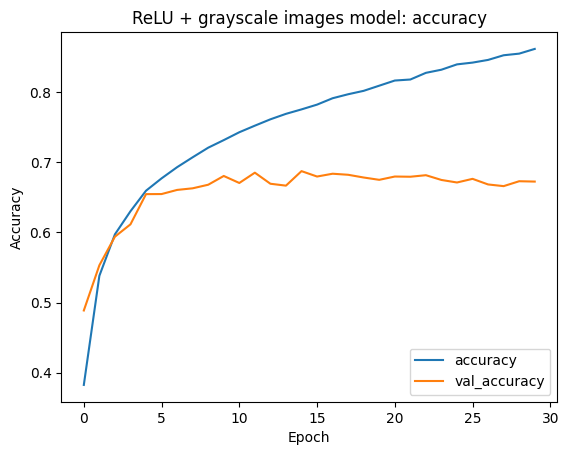

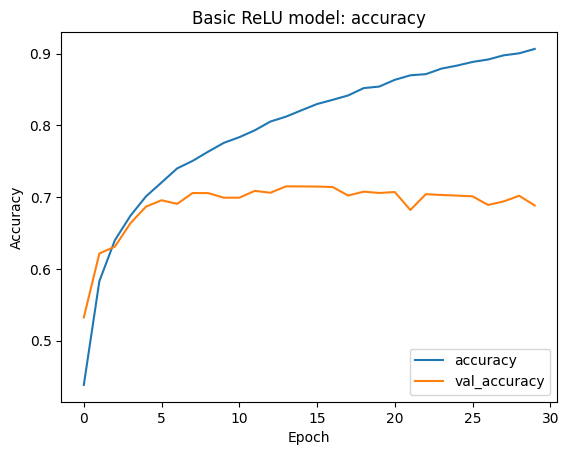

In [ ]:
# grayscale images model
model_gray = models.Sequential(
    [
        # only difference from basic model is channel dimension
        tf.keras.Input((32, 32, 1)),

        layers.Conv2D(32, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model_gray.summary()

model_gray.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# default mini-batch size is 32
history_gray = model_gray.fit(train_images_gray, train_labels, epochs=30,
                              validation_data=(test_images_gray, test_labels))

# testing the grayscale model
test_loss_gray, test_acc_gray = model_gray.evaluate(test_images_gray,  test_labels, verbose=2)
print("\nTest accuracy with ReLU + graycale images model: ", test_acc_gray)
print("Test accuracy with basic ReLU model: ", test_acc)

plt.plot(history_gray.history['loss'], label='Training loss')
plt.plot(history_gray.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU + grayscale images model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history_gray.history['accuracy'], label='accuracy')
plt.plot(history_gray.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ReLU + grayscale images model: accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic ReLU model: accuracy')
plt.legend(loc='lower right')
plt.show()

For the grayscale model, the test accuracy evaluated to 68 % as opposed to the 69 % for the basic ReLU model. Regarding the loss, the convergence seems to be slightly slower for the grayscale model, and the minimum validation loss is slightly higher than the minimum validation loss for the basic ReLU model. They are, however, very similar in all aspects.

The main difference between the two models is that the training convergence is slightly slower and the overfitting slightly less for the grayscale model. One could argue that by removing color we force the model to focus more on contours and shapes. With less complexity, we are less prone to overfitting. It should also be mentioned that the grayscale model computed in roughly two thirds of the time that it took the basic ReLU model. As such, this seems like a very fair trade between loss and efficiency on the one hand, and generalization power and training convergence speed on the other.

This seems very much like a no-free-lunch-scenario in the sense that the trade seems very fair.